# Computational Social Science Project #3 

**Mohammed Bello**

*Semester:* Fall 2025

## 1. Introduction

### Load data 

In [70]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [71]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [23]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [72]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [73]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [74]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

In [75]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

Let's visualize what the distribution of results looks like.

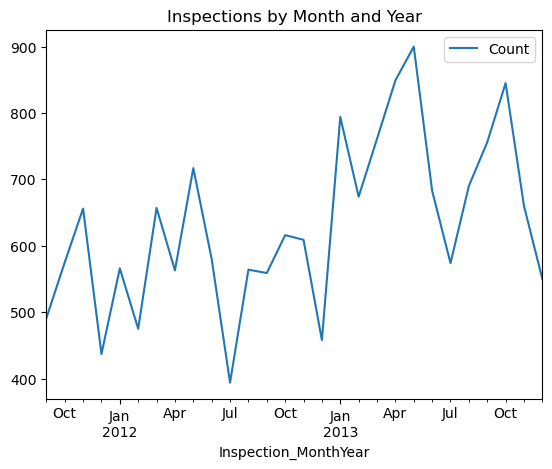

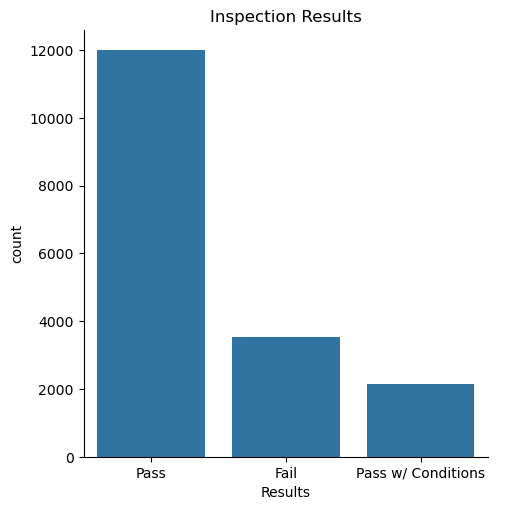

In [76]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

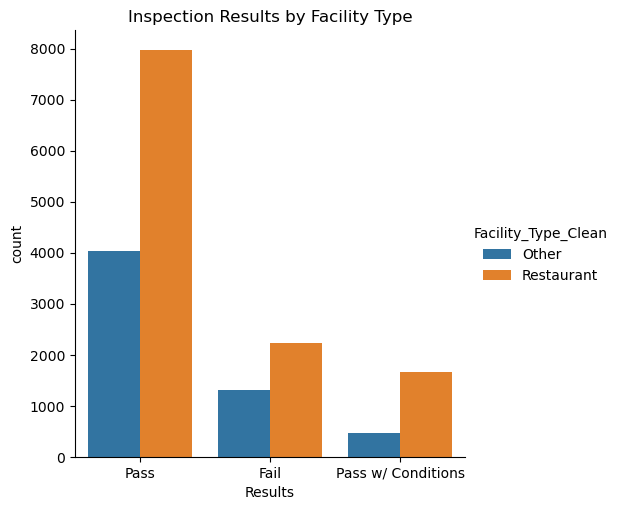

In [77]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [78]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [79]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [32]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

**The three models I chose are random forests, AdaBoost, and XGBoost**

1) Random Forest: 
 
 I used a Random Forest classifier as one of the core models to predict whether a business would pass or fail a food inspection. Random Forest is good for this task because it can  handle the complex, nonlinear relationships present in the Chicago inspection data. The data includes a mix of numeric variables (such as past critical, serious, and minor violations), categorical features (facility type, risk category, and business licenses), and neighborhood or environmental characteristics. 
 
 The model works by training many decision trees on bootstrapped samples of the data and aggregating their predictions through majority voting. This approach reduces overfitting and improves stability. Random Forests assumes that meaningful patterns exist in historical inspection behavior and that ensemble averaging improves generalization. Its major advantages are that it provides strong predictive accuracy, robustness to noise, automatic modeling of interactions, and the ability to provide feature importance scores that help explain which factors most drive inspection failures. 
 
 However, Random Forest is less interpretable than a single decision tree, requires more computational resources, and does not always achieve the same performance as boosting methods like XGBoost. Despite these limitations, it is a useful model for this problem because it can learn complex relationships without heavy assumptions, can works well with heterogeneous real-world data, and produces reliable predictions that can help the Department of Public Health prioritize inspections efficiently and transparently.

### Model 1

In [ ]:
#random forest without hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

rf_classifier = RandomForestClassifier(
                       
                       n_estimators=100,              
                       criterion='gini',              
                       max_depth=None,               
                       min_samples_split=2,           
                       min_samples_leaf=1,            
                       min_weight_fraction_leaf=0.0,  
                       max_features=None,             
                       max_leaf_nodes=None,         
                       min_impurity_decrease=1e-07,   
                       random_state = 10)             


In [81]:
scores = cross_val_score(rf_classifier, 
                         X, 
                         y.ravel(), 
                         cv=5)

In [82]:
scores.mean()

np.float64(0.9214291091093141)

In order to find the best parameters, I utilize the RandomizedSearchCV from the sklearn library. This will allow each of my models to explore a wide range of hyperparameter combinations efficiently without testing every possible setting. I chose to use this over GridSearchCV since its significantly faster and more comuptationally efficient, especially for models like RFs and XGboost that have many tunable parameters. RandomizedSearchCV helps me identify the strongest performing configurations that will improve model accuracy. 

In [ ]:
#import libraries 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

rf = RandomForestClassifier(random_state=10)

# Define the parameter distributions to sample from
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(5, 51, 5)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=50,               # number of combinations to try
    scoring='accuracy',      
    cv=5,
    n_jobs=-1,               # use all available cores
    verbose=2,
    random_state=10
)

random_search.fit(X, y)

print("Best parameters:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed whe

[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=140; total time=   1.5s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=140; total time=   1.5s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=140; total time=   1.6s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=140; total time=   1.6s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=140; total time=   1.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=17, n_estimators=495; total time=   5.5s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=18, min_samples_split=18, n_estimators=469; total time=   7.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=18, min_samples_split=18, n_estimators=469; total time=   7.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=18, min_samples_split=18, n_estimators=469; total time=   7.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=18, min_samples_split=18, n_estimators=469; total time=   7.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=17, n_estimators=495; total time=   5.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=18, min_samples_split=18, n_estimators=469; total time=   7.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=17, n_estimators=495; total time=   5.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=17, n_estimators=495; total time=   5.6s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=17, n_estimators=495; total time=   5.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=5, max_features=None, min_samples_leaf=14, min_samples_split=7, n_estimators=113; total time=   3.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=5, max_features=None, min_samples_leaf=14, min_samples_split=7, n_estimators=113; total time=   3.4s
[CV] END bootstrap=True, max_depth=5, max_features=None, min_samples_leaf=14, min_samples_split=7, n_estimators=113; total time=   3.6s
[CV] END bootstrap=True, max_depth=5, max_features=None, min_samples_leaf=14, min_samples_split=7, n_estimators=113; total time=   3.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=5, max_features=None, min_samples_leaf=14, min_samples_split=7, n_estimators=113; total time=   3.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=45, max_features=sqrt, min_samples_leaf=19, min_samples_split=15, n_estimators=194; total time=   2.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=45, max_features=sqrt, min_samples_leaf=19, min_samples_split=15, n_estimators=194; total time=   2.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=45, max_features=sqrt, min_samples_leaf=19, min_samples_split=15, n_estimators=194; total time=   2.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=40, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=456; total time=  19.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=45, max_features=sqrt, min_samples_leaf=19, min_samples_split=15, n_estimators=194; total time=   2.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=45, max_features=sqrt, min_samples_leaf=19, min_samples_split=15, n_estimators=194; total time=   2.9s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=17, n_estimators=118; total time=   1.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=17, n_estimators=118; total time=   1.2s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=17, n_estimators=118; total time=   1.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=17, n_estimators=118; total time=   1.3s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=17, n_estimators=118; total time=   1.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=40, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=456; total time=  20.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=40, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=456; total time=  20.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=40, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=456; total time=  20.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=40, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=456; total time=  21.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=12, min_samples_split=19, n_estimators=235; total time=   2.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=12, min_samples_split=19, n_estimators=235; total time=   2.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=12, min_samples_split=19, n_estimators=235; total time=   2.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=12, min_samples_split=19, n_estimators=235; total time=   2.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=12, min_samples_split=19, n_estimators=235; total time=   2.4s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=233; total time=   1.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=233; total time=   1.9s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=233; total time=   1.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=233; total time=   1.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=45, max_features=None, min_samples_leaf=14, min_samples_split=14, n_estimators=421; total time=  24.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=233; total time=   1.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=19, min_samples_split=14, n_estimators=282; total time=   2.8s
[CV] END bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=19, min_samples_split=14, n_estimators=282; total time=   2.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=19, min_samples_split=14, n_estimators=282; total time=   2.9s
[CV] END bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=19, min_samples_split=14, n_estimators=282; total time=   2.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=19, min_samples_split=14, n_estimators=282; total time=   2.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=16, min_samples_split=8, n_estimators=346; total time=   3.1s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=16, min_samples_split=8, n_estimators=346; total time=   3.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=16, min_samples_split=8, n_estimators=346; total time=   3.1s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=16, min_samples_split=8, n_estimators=346; total time=   3.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=16, min_samples_split=8, n_estimators=346; total time=   3.1s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=45, max_features=None, min_samples_leaf=14, min_samples_split=14, n_estimators=421; total time=  26.5s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=45, max_features=None, min_samples_leaf=14, min_samples_split=14, n_estimators=421; total time=  28.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=45, max_features=None, min_samples_leaf=14, min_samples_split=14, n_estimators=421; total time=  28.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=45, max_features=None, min_samples_leaf=14, min_samples_split=14, n_estimators=421; total time=  29.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=12, min_samples_split=3, n_estimators=406; total time=   3.7s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=12, min_samples_split=3, n_estimators=406; total time=   3.7s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=12, min_samples_split=3, n_estimators=406; total time=   3.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=18, min_samples_split=17, n_estimators=464; total time=  15.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=18, min_samples_split=17, n_estimators=464; total time=  17.8s
[CV] END bootstrap=False, max_depth=50, max_features=None, min_samples_leaf=12, min_samples_split=18, n_estimators=368; total time=  21.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=18, min_samples_split=17, n_estimators=464; total time=  18.0s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=12, min_samples_split=3, n_estimators=406; total time=   3.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=12, min_samples_split=3, n_estimators=406; total time=   3.8s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=18, min_samples_split=17, n_estimators=464; total time=  16.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=35, max_features=log2, min_samples_leaf=17, min_samples_split=18, n_estimators=114; total time=   1.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=18, min_samples_split=17, n_estimators=464; total time=  18.1s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=7, n_estimators=228; total time=   3.6s
[CV] END bootstrap=True, max_depth=35, max_features=log2, min_samples_leaf=17, min_samples_split=18, n_estimators=114; total time=   1.1s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=7, n_estimators=228; total time=   3.7s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed whe

[CV] END bootstrap=False, max_depth=50, max_features=None, min_samples_leaf=12, min_samples_split=18, n_estimators=368; total time=  23.3s
[CV] END bootstrap=True, max_depth=35, max_features=log2, min_samples_leaf=17, min_samples_split=18, n_estimators=114; total time=   1.1s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=7, n_estimators=228; total time=   3.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=7, n_estimators=228; total time=   3.7s
[CV] END bootstrap=True, max_depth=35, max_features=log2, min_samples_leaf=17, min_samples_split=18, n_estimators=114; total time=   1.0s
[CV] END bootstrap=True, max_depth=35, max_features=log2, min_samples_leaf=17, min_samples_split=18, n_estimators=114; total time=   1.0s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=7, n_estimators=228; total time=   3.6s
[CV] END bootstrap=False, max_depth=50, max_features=None, min_samples_leaf=12, min_samples_split=18, n_estimators=368; total time=  25.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed whe

[CV] END bootstrap=False, max_depth=50, max_features=None, min_samples_leaf=12, min_samples_split=18, n_estimators=368; total time=  26.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=18, n_estimators=141; total time=   2.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=18, n_estimators=141; total time=   2.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=18, n_estimators=141; total time=   2.1s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed whe

[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=18, n_estimators=141; total time=   2.0s
[CV] END bootstrap=False, max_depth=50, max_features=None, min_samples_leaf=12, min_samples_split=18, n_estimators=368; total time=  25.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=19, min_samples_split=16, n_estimators=334; total time=   4.3s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=18, n_estimators=141; total time=   2.0s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=19, min_samples_split=16, n_estimators=334; total time=   4.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=19, min_samples_split=16, n_estimators=334; total time=   4.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=19, min_samples_split=16, n_estimators=334; total time=   4.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=19, min_samples_split=16, n_estimators=334; total time=   4.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=354; total time=   3.9s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=354; total time=   3.9s
[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=354; total time=   4.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=354; total time=   4.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=354; total time=   4.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=18, min_samples_split=19, n_estimators=244; total time=   8.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=18, min_samples_split=19, n_estimators=244; total time=   8.7s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=18, min_samples_split=19, n_estimators=244; total time=   9.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=18, min_samples_split=19, n_estimators=244; total time=   9.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=182; total time=   7.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=18, min_samples_split=19, n_estimators=244; total time=   9.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=12, min_samples_split=18, n_estimators=473; total time=   4.5s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=12, min_samples_split=18, n_estimators=473; total time=   4.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=12, min_samples_split=18, n_estimators=473; total time=   4.4s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=182; total time=   7.9s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=182; total time=   7.9s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=182; total time=   8.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed whe

[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=12, min_samples_split=18, n_estimators=473; total time=   4.6s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=182; total time=   8.1s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=12, min_samples_split=18, n_estimators=473; total time=   4.5s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=9, min_samples_split=15, n_estimators=130; total time=   2.1s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=6, min_samples_split=11, n_estimators=268; total time=   4.4s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=6, min_samples_split=11, n_estimators=268; total time=   4.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=6, min_samples_split=11, n_estimators=268; total time=   4.5s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=6, min_samples_split=11, n_estimators=268; total time=   4.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=13, n_estimators=195; total time=   8.4s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=9, min_samples_split=15, n_estimators=130; total time=   2.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=6, min_samples_split=11, n_estimators=268; total time=   4.5s
[CV] END bootstrap=False, max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=13, n_estimators=195; total time=   9.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=9, min_samples_split=15, n_estimators=130; total time=   2.1s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=9, min_samples_split=15, n_estimators=130; total time=   1.9s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=9, min_samples_split=15, n_estimators=130; total time=   2.2s
[CV] END bootstrap=False, max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=13, n_estimators=195; total time=   9.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed whe

[CV] END bootstrap=False, max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=13, n_estimators=195; total time=   9.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=45, max_features=log2, min_samples_leaf=15, min_samples_split=19, n_estimators=313; total time=   4.2s
[CV] END bootstrap=False, max_depth=45, max_features=log2, min_samples_leaf=15, min_samples_split=19, n_estimators=313; total time=   4.3s
[CV] END bootstrap=False, max_depth=5, max_features=None, min_samples_leaf=6, min_samples_split=13, n_estimators=195; total time=   9.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed whe

[CV] END bootstrap=False, max_depth=45, max_features=log2, min_samples_leaf=15, min_samples_split=19, n_estimators=313; total time=   4.3s
[CV] END bootstrap=False, max_depth=45, max_features=log2, min_samples_leaf=15, min_samples_split=19, n_estimators=313; total time=   4.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=45, max_features=log2, min_samples_leaf=15, min_samples_split=19, n_estimators=313; total time=   4.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=45, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=447; total time=   4.6s
[CV] END bootstrap=True, max_depth=45, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=447; total time=   4.6s
[CV] END bootstrap=True, max_depth=45, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=447; total time=   4.7s
[CV] END bootstrap=True, max_depth=45, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=447; total time=   4.7s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed whe

[CV] END bootstrap=True, max_depth=45, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=447; total time=   4.7s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=45, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=109; total time=   7.7s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=45, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=109; total time=   8.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=45, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=109; total time=   8.9s
[CV] END bootstrap=False, max_depth=45, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=109; total time=   9.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=45, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=109; total time=   9.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=50, max_features=None, min_samples_leaf=10, min_samples_split=4, n_estimators=215; total time=   7.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=16, min_samples_split=18, n_estimators=398; total time=   3.5s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=16, min_samples_split=18, n_estimators=398; total time=   4.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=50, max_features=None, min_samples_leaf=10, min_samples_split=4, n_estimators=215; total time=   9.3s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=16, min_samples_split=18, n_estimators=398; total time=   4.1s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=50, max_features=None, min_samples_leaf=10, min_samples_split=4, n_estimators=215; total time=   8.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=50, max_features=None, min_samples_leaf=10, min_samples_split=4, n_estimators=215; total time=   9.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=50, max_features=None, min_samples_leaf=10, min_samples_split=4, n_estimators=215; total time=   9.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=16, min_samples_split=18, n_estimators=398; total time=   4.0s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=7, min_samples_split=16, n_estimators=476; total time=  18.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=16, min_samples_split=18, n_estimators=398; total time=   3.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=7, min_samples_split=16, n_estimators=476; total time=  20.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=7, min_samples_split=16, n_estimators=476; total time=  20.9s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=7, min_samples_split=16, n_estimators=476; total time=  21.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=7, min_samples_split=16, n_estimators=476; total time=  21.1s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=243; total time=   3.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=243; total time=   2.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=243; total time=   2.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=243; total time=   3.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=476; total time=  20.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=243; total time=   3.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=144; total time=   2.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=144; total time=   2.4s
[CV] END bootstrap=True, max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=476; total time=  23.0s
[CV] END bootstrap=True, max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=476; total time=  22.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=476; total time=  23.1s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=144; total time=   2.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=144; total time=   2.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=144; total time=   2.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=7, n_estimators=476; total time=  23.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=301; total time=   3.1s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=301; total time=   3.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=11, n_estimators=140; total time=   1.5s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=11, n_estimators=140; total time=   1.5s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=11, n_estimators=140; total time=   1.5s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=301; total time=   3.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=17, min_samples_split=14, n_estimators=485; total time=  26.0s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=301; total time=   3.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=301; total time=   3.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=11, n_estimators=140; total time=   1.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=11, n_estimators=140; total time=   1.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=35, max_features=None, min_samples_leaf=18, min_samples_split=9, n_estimators=149; total time=   4.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=35, max_features=None, min_samples_leaf=18, min_samples_split=9, n_estimators=149; total time=   5.5s
[CV] END bootstrap=False, max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=121; total time=   5.1s
[CV] END bootstrap=True, max_depth=35, max_features=None, min_samples_leaf=18, min_samples_split=9, n_estimators=149; total time=   5.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=35, max_features=None, min_samples_leaf=18, min_samples_split=9, n_estimators=149; total time=   5.6s
[CV] END bootstrap=True, max_depth=35, max_features=None, min_samples_leaf=18, min_samples_split=9, n_estimators=149; total time=   5.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=17, min_samples_split=14, n_estimators=485; total time=  29.1s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=17, min_samples_split=14, n_estimators=485; total time=  31.6s
[CV] END bootstrap=False, max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=121; total time=   5.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=14, min_samples_split=10, n_estimators=103; total time=   1.5s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=14, min_samples_split=10, n_estimators=103; total time=   1.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=14, min_samples_split=10, n_estimators=103; total time=   1.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=14, min_samples_split=10, n_estimators=103; total time=   1.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=14, min_samples_split=10, n_estimators=103; total time=   1.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=17, min_samples_split=14, n_estimators=485; total time=  31.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=17, min_samples_split=14, n_estimators=485; total time=  31.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=121; total time=   6.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=9, min_samples_split=18, n_estimators=302; total time=   3.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=9, min_samples_split=18, n_estimators=302; total time=   3.3s
[CV] END bootstrap=False, max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=121; total time=   6.1s
[CV] END bootstrap=False, max_depth=5, max_features=None, min_samples_leaf=11, min_samples_split=17, n_estimators=121; total time=   6.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=35, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=347; total time=   5.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=9, min_samples_split=18, n_estimators=302; total time=   3.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=35, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=347; total time=   5.6s
[CV] END bootstrap=False, max_depth=35, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=347; total time=   5.5s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=35, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=347; total time=   5.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=35, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=347; total time=   5.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=9, min_samples_split=18, n_estimators=302; total time=   3.0s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=220; total time=   2.2s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=220; total time=   2.2s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=220; total time=   2.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed whe

[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=220; total time=   2.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=9, min_samples_split=18, n_estimators=302; total time=   3.1s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=220; total time=   2.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=204; total time=   2.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=204; total time=   2.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=204; total time=   2.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=204; total time=   2.5s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=19, min_samples_split=11, n_estimators=289; total time=   3.8s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=19, min_samples_split=11, n_estimators=289; total time=   3.7s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=204; total time=   2.4s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=19, min_samples_split=11, n_estimators=289; total time=   3.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=19, min_samples_split=11, n_estimators=289; total time=   3.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=19, min_samples_split=11, n_estimators=289; total time=   3.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=381; total time=   7.2s
[CV] END bootstrap=False, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=381; total time=   7.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=381; total time=   7.4s
[CV] END bootstrap=False, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=381; total time=   7.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=381; total time=   7.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=18, min_samples_split=8, n_estimators=186; total time=  10.1s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=351; total time=   6.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=265; total time=  17.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=351; total time=   6.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=18, min_samples_split=8, n_estimators=186; total time=  11.3s
[CV] END bootstrap=False, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=265; total time=  19.7s
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=18, min_samples_split=8, n_estimators=186; total time=  12.5s
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=18, min_samples_split=8, n_estimators=186; total time=  12.5s
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=18, min_samples_split=8, n_estimators=186; total time=  12.2s
[CV] END bootstrap=False, max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=265; total time=  20.7s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=351; total time=   6.3s
[CV] END bootstrap=False, max_depth=1

In [37]:
#random forest with best parameters from hyperparameter tuning
rf_best = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=7,
    min_samples_split=11,
    n_estimators=140,
    random_state=10
)


In [ ]:
scores_best = cross_val_score(rf_best, 
                         X, 
                         y.ravel(), 
                         cv=5)

In [39]:
scores_best.mean()  

np.float64(0.9254132624849849)

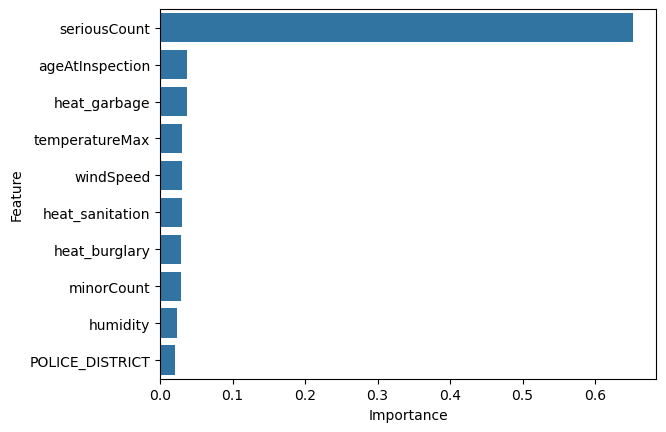

In [ ]:
#fit the random forest model 
# fit the random forest on data to get feature importance
# ----------
rf_classifier.fit(X, y.ravel())


import seaborn as sns

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

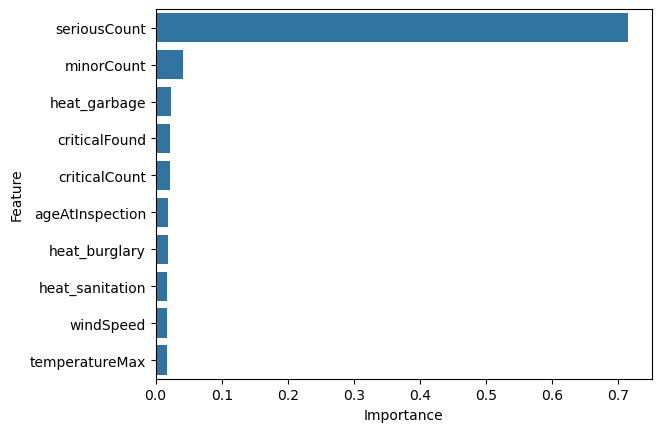

In [ ]:
#fit the random forest model 
# fit the random forest on data to get feature importance
# ----------
rf_best.fit(X, y.ravel())


import seaborn as sns

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_best.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

###  Model 2

2) Adaboost:
I also use AdaBoost as a classification model because it's designed to combine weak learners, to create a strong and focused predictive model. Adaboost first trains a tree, evaluates its errors, and then increases the weights of the misclassified observations so that the subsequen ree pays more attention to the difficult cases. This process then cycles, until it produces a final classifier that cocnentrates its learning power where earlier models struggled. 

Adaboost assumes that weak learners perform slightly better than random chance, and that boosting these learners iteratively will reduce bias and variance. Adaboost is advantageous because its simple, fast, and can handle nonlinear relationships, not requiring extensive tuning. However, its limitations are that it can be sensitive to noise and outliers because misclassified points receive larger weights. 

Adaboost is useful for predicting food inspection failures because our data includes subtle patterns of combinations between variables, such as past violations, facility characteristics, and risk levels. These combinations can be boosted to focus on difficult classifying observations, which will in turn, improve the accuracity of our model. 

In [42]:
#adaboost 
from sklearn.ensemble import AdaBoostClassifier


In [43]:

ada_classifier = AdaBoostClassifier(n_estimators=100)

In [44]:
scores = cross_val_score(ada_classifier,  # specify classifier
                         X,               # specify features
                         y.ravel(),       # specify labels
                         cv = 5)          # specify 5-fold cross validation

In [45]:
scores.mean()

np.float64(0.9180330200558572)

Again I use RandomizedSearcCV to find the best parameters. 

In [ ]:
#hyperparameter tuning for adaboost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint, uniform
ada = AdaBoostClassifier(random_state=10)

# Define the parameter distributions to sample from
param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 1.0)
}
random_search_ada = RandomizedSearchCV(
    ada,
    param_distributions=param_dist,
    n_iter=50,             
    scoring='accuracy',     
    cv=5,
    n_jobs=-1,               
    verbose=2,
    random_state=10
)

random_search_ada.fit(X, y)
print("Best parameters:", random_search_ada.best_params_)
print("Best CV score:", random_search_ada.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END .learning_rate=0.5045899295333641, n_estimators=163; total time=   2.2s
[CV] END .learning_rate=0.5045899295333641, n_estimators=163; total time=   2.2s
[CV] END .learning_rate=0.5045899295333641, n_estimators=163; total time=   2.2s
[CV] END .learning_rate=0.5045899295333641, n_estimators=163; total time=   2.3s
[CV] END .learning_rate=0.5045899295333641, n_estimators=163; total time=   2.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END ..learning_rate=0.781320643266746, n_estimators=278; total time=   3.8s
[CV] END ..learning_rate=0.781320643266746, n_estimators=278; total time=   3.8s
[CV] END ..learning_rate=0.781320643266746, n_estimators=278; total time=   3.8s
[CV] END ..learning_rate=0.781320643266746, n_estimators=278; total time=   3.8s
[CV] END ..learning_rate=0.781320643266746, n_estimators=278; total time=   3.8s
[CV] END .learning_rate=0.7588038825386119, n_estimators=267; total time=   3.7s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END ...learning_rate=0.208062864759624, n_estimators=58; total time=   0.8s
[CV] END ...learning_rate=0.208062864759624, n_estimators=58; total time=   0.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.5933217369377363, n_estimators=207; total time=   2.9s
[CV] END ...learning_rate=0.208062864759624, n_estimators=58; total time=   0.8s
[CV] END ...learning_rate=0.208062864759624, n_estimators=58; total time=   0.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.7588038825386119, n_estimators=267; total time=   3.7s
[CV] END .learning_rate=0.7588038825386119, n_estimators=267; total time=   3.7s
[CV] END .learning_rate=0.7588038825386119, n_estimators=267; total time=   3.7s
[CV] END .learning_rate=0.7588038825386119, n_estimators=267; total time=   3.8s
[CV] END ...learning_rate=0.208062864759624, n_estimators=58; total time=   0.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END .learning_rate=0.5933217369377363, n_estimators=207; total time=   2.8s
[CV] END .learning_rate=0.5933217369377363, n_estimators=207; total time=   2.9s
[CV] END .learning_rate=0.5933217369377363, n_estimators=207; total time=   2.9s
[CV] END .learning_rate=0.5933217369377363, n_estimators=207; total time=   2.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END .learning_rate=0.6938184293612342, n_estimators=150; total time=   2.0s
[CV] END learning_rate=0.09833981417401026, n_estimators=214; total time=   2.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END learning_rate=0.09833981417401026, n_estimators=214; total time=   2.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.275566126772097, n_estimators=284; total time=   3.8s
[CV] END ..learning_rate=0.275566126772097, n_estimators=284; total time=   3.8s
[CV] END learning_rate=0.09833981417401026, n_estimators=214; total time=   2.8s
[CV] END learning_rate=0.09833981417401026, n_estimators=214; total time=   2.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END learning_rate=0.09833981417401026, n_estimators=214; total time=   2.8s
[CV] END ..learning_rate=0.275566126772097, n_estimators=284; total time=   3.7s
[CV] END ..learning_rate=0.275566126772097, n_estimators=284; total time=   3.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END ..learning_rate=0.275566126772097, n_estimators=284; total time=   3.7s
[CV] END learning_rate=0.013948266327914452, n_estimators=104; total time=   1.3s
[CV] END .learning_rate=0.6938184293612342, n_estimators=150; total time=   2.0s
[CV] END learning_rate=0.013948266327914452, n_estimators=104; total time=   1.3s
[CV] END .learning_rate=0.6938184293612342, n_estimators=150; total time=   1.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END learning_rate=0.013948266327914452, n_estimators=104; total time=   1.3s
[CV] END learning_rate=0.013948266327914452, n_estimators=104; total time=   1.4s
[CV] END .learning_rate=0.6938184293612342, n_estimators=150; total time=   1.9s
[CV] END learning_rate=0.013948266327914452, n_estimators=104; total time=   1.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END .learning_rate=0.6938184293612342, n_estimators=150; total time=   2.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.9008165306793224, n_estimators=172; total time=   2.2s
[CV] END .learning_rate=0.9008165306793224, n_estimators=172; total time=   2.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.9008165306793224, n_estimators=172; total time=   2.1s
[CV] END .learning_rate=0.9008165306793224, n_estimators=172; total time=   2.2s
[CV] END .learning_rate=0.9008165306793224, n_estimators=172; total time=   2.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.6225260668293882, n_estimators=250; total time=   3.2s
[CV] END .learning_rate=0.8876149398973291, n_estimators=227; total time=   2.8s
[CV] END .learning_rate=0.6225260668293882, n_estimators=250; total time=   3.2s
[CV] END .learning_rate=0.6225260668293882, n_estimators=250; total time=   3.2s
[CV] END .learning_rate=0.6225260668293882, n_estimators=250; total time=   3.2s
[CV] END .learning_rate=0.6225260668293882, n_estimators=250; total time=   3.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END .learning_rate=0.9277741225129434, n_estimators=127; total time=   1.7s
[CV] END .learning_rate=0.8876149398973291, n_estimators=227; total time=   2.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.8876149398973291, n_estimators=227; total time=   2.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.8876149398973291, n_estimators=227; total time=   2.8s
[CV] END .learning_rate=0.9277741225129434, n_estimators=127; total time=   1.6s
[CV] END .learning_rate=0.9277741225129434, n_estimators=127; total time=   1.7s
[CV] END .learning_rate=0.8876149398973291, n_estimators=227; total time=   2.8s
[CV] END .learning_rate=0.9277741225129434, n_estimators=127; total time=   1.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END .learning_rate=0.9277741225129434, n_estimators=127; total time=   1.6s
[CV] END ..learning_rate=0.5939013656536759, n_estimators=80; total time=   1.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.5939013656536759, n_estimators=80; total time=   1.0s
[CV] END .learning_rate=0.1414581524025229, n_estimators=293; total time=   3.7s
[CV] END .learning_rate=0.1414581524025229, n_estimators=293; total time=   3.7s
[CV] END learning_rate=0.15217004760152697, n_estimators=191; total time=   2.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END learning_rate=0.15217004760152697, n_estimators=191; total time=   2.4s
[CV] END learning_rate=0.15217004760152697, n_estimators=191; total time=   2.4s
[CV] END learning_rate=0.15217004760152697, n_estimators=191; total time=   2.4s
[CV] END learning_rate=0.15217004760152697, n_estimators=191; total time=   2.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END .learning_rate=0.1414581524025229, n_estimators=293; total time=   3.7s
[CV] END .learning_rate=0.1414581524025229, n_estimators=293; total time=   3.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.1414581524025229, n_estimators=293; total time=   3.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.5939013656536759, n_estimators=80; total time=   1.0s
[CV] END ..learning_rate=0.5939013656536759, n_estimators=80; total time=   1.0s
[CV] END ..learning_rate=0.5939013656536759, n_estimators=80; total time=   1.1s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END learning_rate=0.11540183348780107, n_estimators=107; total time=   1.4s
[CV] END ..learning_rate=0.5231382425543909, n_estimators=68; total time=   0.9s
[CV] END learning_rate=0.11540183348780107, n_estimators=107; total time=   1.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END learning_rate=0.11540183348780107, n_estimators=107; total time=   1.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END learning_rate=0.11540183348780107, n_estimators=107; total time=   1.3s
[CV] END learning_rate=0.11540183348780107, n_estimators=107; total time=   1.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.4518331744229961, n_estimators=190; total time=   2.5s
[CV] END .learning_rate=0.4518331744229961, n_estimators=190; total time=   2.4s
[CV] END .learning_rate=0.4518331744229961, n_estimators=190; total time=   2.5s
[CV] END .learning_rate=0.4518331744229961, n_estimators=190; total time=   2.5s
[CV] END ..learning_rate=0.5231382425543909, n_estimators=68; total time=   0.9s
[CV] END .learning_rate=0.4518331744229961, n_estimators=190; total time=   2.5s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END ..learning_rate=0.5231382425543909, n_estimators=68; total time=   0.8s
[CV] END ..learning_rate=0.5231382425543909, n_estimators=68; total time=   0.9s
[CV] END ..learning_rate=0.5231382425543909, n_estimators=68; total time=   0.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.6219433411110109, n_estimators=124; total time=   1.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END learning_rate=0.06644418747007062, n_estimators=200; total time=   2.6s
[CV] END learning_rate=0.06644418747007062, n_estimators=200; total time=   2.6s
[CV] END learning_rate=0.06644418747007062, n_estimators=200; total time=   2.5s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END learning_rate=0.06644418747007062, n_estimators=200; total time=   2.6s
[CV] END learning_rate=0.06644418747007062, n_estimators=200; total time=   2.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.3292360889885453, n_estimators=65; total time=   0.8s
[CV] END ..learning_rate=0.3292360889885453, n_estimators=65; total time=   0.8s
[CV] END .learning_rate=0.6219433411110109, n_estimators=124; total time=   1.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.6219433411110109, n_estimators=124; total time=   1.5s
[CV] END .learning_rate=0.8152231968327465, n_estimators=298; total time=   3.8s
[CV] END .learning_rate=0.8152231968327465, n_estimators=298; total time=   3.8s
[CV] END .learning_rate=0.8152231968327465, n_estimators=298; total time=   3.8s
[CV] END .learning_rate=0.8152231968327465, n_estimators=298; total time=   3.7s
[CV] END .learning_rate=0.6219433411110109, n_estimators=124; total time=   1.6s
[CV] END .learning_rate=0.8152231968327465, n_estimators=298; total time=   3.7s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END .learning_rate=0.6219433411110109, n_estimators=124; total time=   1.6s
[CV] END ..learning_rate=0.3292360889885453, n_estimators=65; total time=   0.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.3292360889885453, n_estimators=65; total time=   0.9s
[CV] END ..learning_rate=0.3292360889885453, n_estimators=65; total time=   0.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...learning_rate=0.34549964651987, n_estimators=168; total time=   2.1s
[CV] END ...learning_rate=0.34549964651987, n_estimators=168; total time=   2.1s
[CV] END ...learning_rate=0.34549964651987, n_estimators=168; total time=   2.2s
[CV] END ...learning_rate=0.34549964651987, n_estimators=168; total time=   2.1s
[CV] END ...learning_rate=0.34549964651987, n_estimators=168; total time=   2.1s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END learning_rate=0.12398436186354976, n_estimators=189; total time=   2.4s
[CV] END learning_rate=0.12398436186354976, n_estimators=189; total time=   2.4s
[CV] END learning_rate=0.12398436186354976, n_estimators=189; total time=   2.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END learning_rate=0.12398436186354976, n_estimators=189; total time=   2.4s
[CV] END learning_rate=0.12398436186354976, n_estimators=189; total time=   2.3s
[CV] END .learning_rate=0.8630429903186583, n_estimators=185; total time=   2.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.6362871483113925, n_estimators=83; total time=   1.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.6362871483113925, n_estimators=83; total time=   1.1s
[CV] END ..learning_rate=0.6362871483113925, n_estimators=83; total time=   1.1s
[CV] END ..learning_rate=0.6362871483113925, n_estimators=83; total time=   1.1s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END ..learning_rate=0.6362871483113925, n_estimators=83; total time=   1.1s
[CV] END .learning_rate=0.8630429903186583, n_estimators=185; total time=   2.3s
[CV] END .learning_rate=0.8630429903186583, n_estimators=185; total time=   2.4s
[CV] END .learning_rate=0.8630429903186583, n_estimators=185; total time=   2.4s
[CV] END .learning_rate=0.8630429903186583, n_estimators=185; total time=   2.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END .learning_rate=0.7417346246487423, n_estimators=146; total time=   1.9s
[CV] END .learning_rate=0.7417346246487423, n_estimators=146; total time=   1.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.7417346246487423, n_estimators=146; total time=   1.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.7417346246487423, n_estimators=146; total time=   1.8s
[CV] END .learning_rate=0.7417346246487423, n_estimators=146; total time=   1.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.2089475396788123, n_estimators=183; total time=   2.4s
[CV] END .learning_rate=0.2089475396788123, n_estimators=183; total time=   2.3s
[CV] END .learning_rate=0.8419897677872527, n_estimators=138; total time=   1.7s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.8419897677872527, n_estimators=138; total time=   1.7s
[CV] END .learning_rate=0.8419897677872527, n_estimators=138; total time=   1.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.2089475396788123, n_estimators=183; total time=   2.3s
[CV] END .learning_rate=0.2089475396788123, n_estimators=183; total time=   2.3s
[CV] END .learning_rate=0.8419897677872527, n_estimators=138; total time=   1.7s
[CV] END .learning_rate=0.2089475396788123, n_estimators=183; total time=   2.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END .learning_rate=0.8419897677872527, n_estimators=138; total time=   2.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.7646476915298572, n_estimators=158; total time=   2.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.7646476915298572, n_estimators=158; total time=   2.1s
[CV] END .learning_rate=0.7646476915298572, n_estimators=158; total time=   2.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.7646476915298572, n_estimators=158; total time=   2.2s
[CV] END .learning_rate=0.8823924598391091, n_estimators=154; total time=   2.1s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.7646476915298572, n_estimators=158; total time=   2.3s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.8823924598391091, n_estimators=154; total time=   2.2s
[CV] END .learning_rate=0.8823924598391091, n_estimators=154; total time=   2.2s
[CV] END .learning_rate=0.8823924598391091, n_estimators=154; total time=   2.2s
[CV] END .learning_rate=0.8823924598391091, n_estimators=154; total time=   2.2s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END .learning_rate=0.3355116378322488, n_estimators=138; total time=   1.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.3355116378322488, n_estimators=138; total time=   1.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.3355116378322488, n_estimators=138; total time=   1.9s
[CV] END .learning_rate=0.3355116378322488, n_estimators=138; total time=   1.8s
[CV] END .learning_rate=0.3355116378322488, n_estimators=138; total time=   1.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.8857444947401377, n_estimators=184; total time=   2.4s
[CV] END .learning_rate=0.8857444947401377, n_estimators=184; total time=   2.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.8857444947401377, n_estimators=184; total time=   2.4s
[CV] END .learning_rate=0.8857444947401377, n_estimators=184; total time=   2.3s
[CV] END .learning_rate=0.8857444947401377, n_estimators=184; total time=   2.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.8528179334934951, n_estimators=162; total time=   2.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.1034603745586503, n_estimators=284; total time=   3.7s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.1034603745586503, n_estimators=284; total time=   3.7s
[CV] END .learning_rate=0.8528179334934951, n_estimators=162; total time=   2.1s
[CV] END .learning_rate=0.8528179334934951, n_estimators=162; total time=   2.1s
[CV] END .learning_rate=0.1034603745586503, n_estimators=284; total time=   3.6s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END .learning_rate=0.8528179334934951, n_estimators=162; total time=   2.1s
[CV] END .learning_rate=0.8528179334934951, n_estimators=162; total time=   2.1s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.1034603745586503, n_estimators=284; total time=   3.7s
[CV] END .learning_rate=0.1034603745586503, n_estimators=284; total time=   3.7s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.3941144486921996, n_estimators=274; total time=   3.5s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.3941144486921996, n_estimators=274; total time=   3.4s
[CV] END .learning_rate=0.4663045470947841, n_estimators=158; total time=   2.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.4463536982806434, n_estimators=235; total time=   2.9s
[CV] END .learning_rate=0.3941144486921996, n_estimators=274; total time=   3.4s
[CV] END .learning_rate=0.4463536982806434, n_estimators=235; total time=   3.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.4463536982806434, n_estimators=235; total time=   3.0s
[CV] END .learning_rate=0.3941144486921996, n_estimators=274; total time=   3.4s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.4463536982806434, n_estimators=235; total time=   3.1s
[CV] END .learning_rate=0.3941144486921996, n_estimators=274; total time=   3.5s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.4463536982806434, n_estimators=235; total time=   3.1s
[CV] END .learning_rate=0.4663045470947841, n_estimators=158; total time=   2.1s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.4663045470947841, n_estimators=158; total time=   2.0s
[CV] END .learning_rate=0.4663045470947841, n_estimators=158; total time=   2.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.4663045470947841, n_estimators=158; total time=   2.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.6073716482308843, n_estimators=147; total time=   1.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.6073716482308843, n_estimators=147; total time=   1.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.6073716482308843, n_estimators=147; total time=   2.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.6073716482308843, n_estimators=147; total time=   1.9s
[CV] END .learning_rate=0.6073716482308843, n_estimators=147; total time=   1.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END learning_rate=0.15947133698593174, n_estimators=287; total time=   3.7s
[CV] END learning_rate=0.15947133698593174, n_estimators=287; total time=   3.7s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END learning_rate=0.15947133698593174, n_estimators=287; total time=   3.8s
[CV] END learning_rate=0.15947133698593174, n_estimators=287; total time=   3.7s
[CV] END learning_rate=0.15947133698593174, n_estimators=287; total time=   3.7s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.647951564301237, n_estimators=218; total time=   2.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.5588163557438683, n_estimators=73; total time=   1.0s
[CV] END ..learning_rate=0.647951564301237, n_estimators=218; total time=   2.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.647951564301237, n_estimators=218; total time=   2.9s
[CV] END ..learning_rate=0.647951564301237, n_estimators=218; total time=   2.8s
[CV] END ..learning_rate=0.5588163557438683, n_estimators=73; total time=   0.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.5588163557438683, n_estimators=73; total time=   1.0s
[CV] END ..learning_rate=0.5588163557438683, n_estimators=73; total time=   0.9s
[CV] END ..learning_rate=0.647951564301237, n_estimators=218; total time=   2.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.6002013629854229, n_estimators=215; total time=   2.8s
[CV] END .learning_rate=0.08961309015596418, n_estimators=66; total time=   0.9s
[CV] END .learning_rate=0.6002013629854229, n_estimators=215; total time=   2.8s
[CV] END ..learning_rate=0.5588163557438683, n_estimators=73; total time=   1.0s
[CV] END .learning_rate=0.08961309015596418, n_estimators=66; total time=   0.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END .learning_rate=0.6002013629854229, n_estimators=215; total time=   2.8s
[CV] END .learning_rate=0.6002013629854229, n_estimators=215; total time=   2.7s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.6002013629854229, n_estimators=215; total time=   2.8s
[CV] END .learning_rate=0.08961309015596418, n_estimators=66; total time=   0.9s
[CV] END .learning_rate=0.08961309015596418, n_estimators=66; total time=   0.9s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.08961309015596418, n_estimators=66; total time=   0.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.7838302962105959, n_estimators=129; total time=   1.6s
[CV] END .learning_rate=0.7838302962105959, n_estimators=129; total time=   1.7s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END learning_rate=0.24503859587549648, n_estimators=162; total time=   2.1s
[CV] END .learning_rate=0.7838302962105959, n_estimators=129; total time=   1.7s
[CV] END learning_rate=0.24503859587549648, n_estimators=162; total time=   2.1s
[CV] END learning_rate=0.24503859587549648, n_estimators=162; total time=   2.1s
[CV] END learning_rate=0.24503859587549648, n_estimators=162; total time=   2.2s
[CV] END learning_rate=0.24503859587549648, n_estimators=162; total time=   2.1s
[CV] END .learning_rate=0.7838302962105959, n_estimators=129; total time=   1.7s
[CV] END .learning_rate=0.7838302962105959, n_estimators=129; total time=   1.7s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was pass

[CV] END .learning_rate=0.12464879919847204, n_estimators=67; total time=   0.8s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END learning_rate=0.21304661564150584, n_estimators=228; total time=   3.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.12464879919847204, n_estimators=67; total time=   1.0s
[CV] END .learning_rate=0.3249268718426883, n_estimators=160; total time=   1.9s
[CV] END .learning_rate=0.3249268718426883, n_estimators=160; total time=   2.0s


/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/envs/CSS/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.3249268718426883, n_estimators=160; total time=   2.1s
[CV] END .learning_rate=0.3249268718426883, n_estimators=160; total time=   2.2s
[CV] END .learning_rate=0.3249268718426883, n_estimators=160; total time=   2.1s
[CV] END .learning_rate=0.12464879919847204, n_estimators=67; total time=   0.8s
[CV] END learning_rate=0.21304661564150584, n_estimators=228; total time=   2.9s
[CV] END learning_rate=0.21304661564150584, n_estimators=228; total time=   2.8s
[CV] END .learning_rate=0.12464879919847204, n_estimators=67; total time=   0.7s
[CV] END learning_rate=0.21304661564150584, n_estimators=228; total time=   2.8s
[CV] END learning_rate=0.21304661564150584, n_estimators=228; total time=   2.8s
[CV] END .learning_rate=0.12464879919847204, n_estimators=67; total time=   0.7s
Best parameters: {'learning_rate': np.float64(0.34549964651987), 'n_estimators': 168}
Best CV score: 0.9224086689854871


In [ ]:
# best parameters from hyperparameter tuning
ada_best = AdaBoostClassifier(
    n_estimators=168,
    learning_rate=float(0.34549964651987),  
    random_state=10
)


In [48]:
scores_best = cross_val_score(ada_best,  
                         X,               
                         y.ravel(),      
                         cv = 5)          

In [49]:
scores_best.mean()

np.float64(0.9224086689854871)

### Model 3

3) XGBoost: 
Lastly, I use XGBoost because of its powerful boosting algorithim that builds trees sequentially. With XGBoost, each new tree learns to correct the erros made by the ensemble so far. Unlike AdBoost, which reweights misclassified observations, XGBoost improves each new tree by focusing on the errors made by previous trees, which makes the model more accurate and flexible. XGBoost assumes the data has complex relationships, and that adding trees one at a time helps the model learn these patterns more accurately.

 Its major advantages include strong predictive performance, effective handling of feature interactions, and built-in regularization that reduces overfitting. XGBoost limitations are that it’s harder to explain because many trees contribute to each prediction, it requires tuning several hyperparameters to get good performance, and it can be computationally expensive since it builds many trees and uses complex optimization. Nevertheless, XGBoost is a strong choice for predicting food inspection failures because the data contains many interacting risk factors that the model can learn well. Its ability to capture complex patterns helps it make accurate predictions and prioritize high-risk establishments more effectively.


In [50]:
#xg boost 
import xgboost as xgb
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score

In [ ]:
# initialize an XGBoost classifier
# ----------
xgb_classifier = xgb.XGBClassifier(random_state=10)


# define the scoring metrics
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }


# perform cross-validation with 5-fold and return the trained estimators
cv_results = cross_validate(xgb_classifier,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return 
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

accuracy: 0.919
recall: 0.839
precision: 0.779
f1: 0.807


In [ ]:
#hyperparameter tuning for xgboost
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions to sample from
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.5),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

random_search_xgb = RandomizedSearchCV(
    xgb_classifier,
    param_distributions=param_dist,
    n_iter=50,               
    scoring='accuracy',     
    cv=5,
    n_jobs=-1,              
    verbose=2,
    random_state=10
)

random_search_xgb.fit(X, y)
print("Best parameters:", random_search_xgb.best_params_)
print("Best CV score:", random_search_xgb.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.7492535061512953, learning_rate=0.12239832276542383, max_depth=4, n_estimators=108, subsample=0.6327830633860485; total time=   0.2s
[CV] END colsample_bytree=0.7492535061512953, learning_rate=0.12239832276542383, max_depth=4, n_estimators=108, subsample=0.6327830633860485; total time=   0.2s
[CV] END colsample_bytree=0.7492535061512953, learning_rate=0.12239832276542383, max_depth=4, n_estimators=108, subsample=0.6327830633860485; total time=   0.2s
[CV] END colsample_bytree=0.7492535061512953, learning_rate=0.12239832276542383, max_depth=4, n_estimators=108, subsample=0.6327830633860485; total time=   0.2s
[CV] END colsample_bytree=0.7492535061512953, learning_rate=0.12239832276542383, max_depth=4, n_estimators=108, subsample=0.6327830633860485; total time=   0.2s
[CV] END colsample_bytree=0.6318014230144762, learning_rate=0.08518893363088297, max_depth=6, n_estimators=116, subsample=0.908300917

In [ ]:
#best parameters from hyperparameter tuning xgboost 

xgb_best = xgb.XGBClassifier(
    colsample_bytree=float(0.8869151481052979),
    subsample=float(0.6574634359213442),
    learning_rate=float(0.029979604344988635),
    max_depth=4,
    n_estimators=278,
    random_state=10,
)  

scoring_best = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }


# perform cross-validation with 5-fold and return the estimators
cv_results = cross_validate(xgb_best,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores_best = cv_results[metric]
    print(f"{metric[5:]}: {scores_best.mean():.3f}")

accuracy: 0.925
recall: 0.895
precision: 0.771
f1: 0.828


### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

When comparing the models using accuracy, precision, recall, and F1 for food inspection, I believe the most important metric for predictive auditing is recall and F1 score. This is because recall measures how well the model indentifies actual failing establishments, which is critical because missing a trule failure can pose big public health risks. While precision matters, the cost of overlooking a high risk establishment is much greater than the cost of inspecting an extra one. The F1 score is also useful because it gives us a clearer picutre of how our model is performing overall when the classes are imbalanced. By highlighting these two metrics, it will help the city efficiently allocate city inspection resources, and protect public health. 

In [54]:
rf_best = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=7,
    min_samples_split=11,
    n_estimators=140,
    random_state=10
)

ada_best = AdaBoostClassifier(
    n_estimators=168,
    learning_rate=float(0.34549964651987),  
    random_state=10
)

xgb_best = xgb.XGBClassifier(
    colsample_bytree=float(0.8869151481052979),
    subsample=float(0.6574634359213442),
    learning_rate=float(0.029979604344988635),
    max_depth=4,
    n_estimators=278,
    random_state=10,
)  

#for loop to compare models using cross_val_score to check for accuracy, precision, recall, and f1 across the three models
from sklearn.model_selection import cross_val_score
models = {
    'Random Forest': rf_best,
    'AdaBoost': ada_best,
    'XGBoost': xgb_best
}
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
for model_name, model in models.items():
    print(f"Results for {model_name}:")
    for metric in scoring_metrics:
        scores = cross_val_score(model, X, y.ravel(), cv=5, scoring=metric)
        print(f"  {metric.capitalize()}: {scores.mean():.3f}")
    print()

    

Results for Random Forest:
  Accuracy: 0.925
  Precision: 0.765
  Recall: 0.912
  F1: 0.831

Results for AdaBoost:
  Accuracy: 0.922
  Precision: 0.757
  Recall: 0.907
  F1: 0.825

Results for XGBoost:
  Accuracy: 0.925
  Precision: 0.771
  Recall: 0.895
  F1: 0.828




Here we see that all three models perform well, but Random Forest and XGBoost achieve the highest overall accuracy at (0.925). Random Forest has the strongest recall (0.912), meaning it is the best at identifying true failing establishments, which helps in predictive auditing. XGBoost offers the highest precision (0.771), making it slightly better at reducing false alarms, while AdaBoost performs similarly but slightly below the other two models across all metrics.


## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

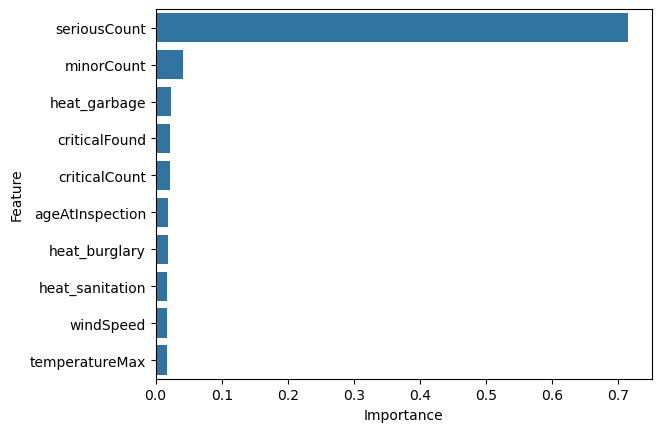

In [55]:
#feature importance for random forest with best parameters
rf_best.fit(X, y.ravel())

# import library
import seaborn as sns

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_best.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

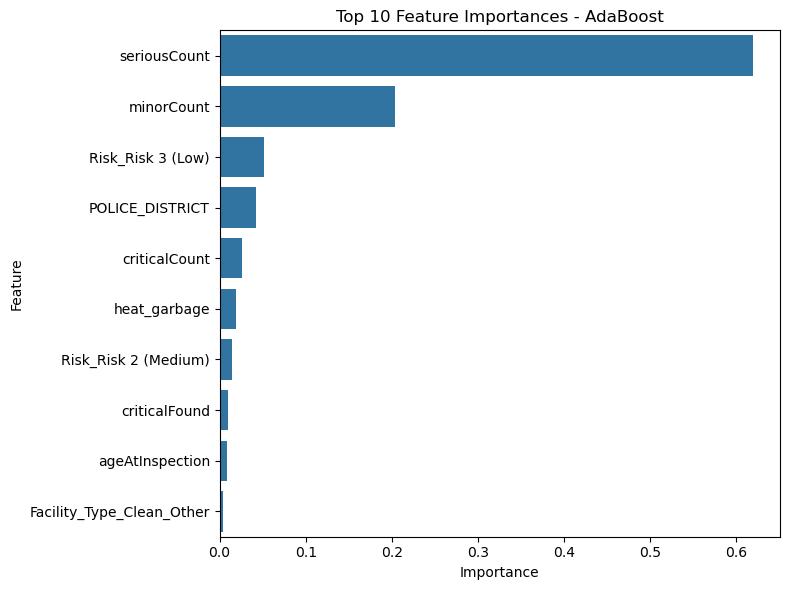

In [56]:
#feature importance for ada boost with best parameters
ada_best.fit(X, y.ravel())

feat_importances_ada = pd.DataFrame({
    "Feature": X.columns,
    "Importance": ada_best.feature_importances_
})

# 3. Keep the top 10 most important features
top10_ada = feat_importances_ada.sort_values(
    by="Importance",
    ascending=False
).head(10)

# 4. Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top10_ada,
    x="Importance",
    y="Feature"
)
plt.title("Top 10 Feature Importances - AdaBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

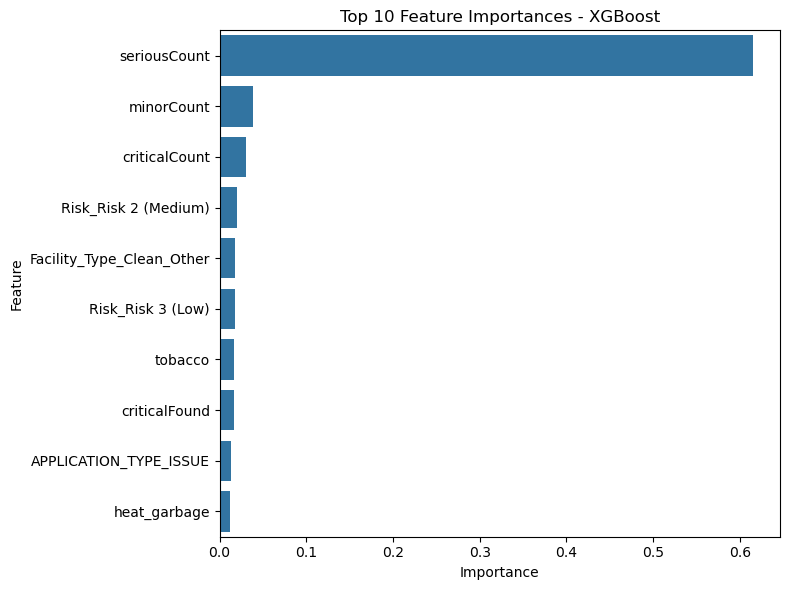

In [57]:
#xg boost feature importance with best parameters
xgb_best.fit(X, y.ravel())

feat_importances_xgb = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_best.feature_importances_
})

# 3. Keep the top 10 most important features
top10_xgb = feat_importances_xgb.sort_values(
    by="Importance",
    ascending=False
).head(10)

# 4. Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top10_xgb,
    x="Importance",
    y="Feature"
)
plt.title("Top 10 Feature Importances - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Across all three models, the most important features are indicators of recent and past violations, especially seriousCount and minorCount. Other meaningful contributors include criticalCount, criticalFound, risk-category indicators such as Risk 2 (Medium) and Risk 3 (Low), and certain business characteristics like Facility_Type_Clean_Other and whether a business holds a tobacco license. These patterns suggest that an establishment’s past inspection history and its inherent risk classification play the largest role in predicting whether it will fail a future inspection. Which makes sense with my prior beliefs of why a business would pass or fail a food inspection. It is important to note that aside from seriousCount and minorCount, the other features contribute very little to the model’s prediction of pass or fail.

To improve our model, having features such as staff/management training indicators would help us determine whether businesses with inadequate training are more likely to fail. Also, having data on restaurant size many help us see if larger restaurants have more violations or not. It may also be useful to have data on the age of each business, since newer restaurants may have higher failures since they are new to the business industry, or older businesses may experience degredation in their building from wear and tear. Lastly, having socioeconomic data about each neighborhood can provide environmental and economic context of whether a business would pass or fail an inspection. 

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [58]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------


xgb_best = xgb.XGBClassifier(
    colsample_bytree=float(0.8869151481052979),
    subsample=float(0.6574634359213442),
    learning_rate=float(0.029979604344988635),
    max_depth=4,
    n_estimators=278,
    random_state=10,
)

xgb_best.fit(X, y.ravel())





XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8869151481052979, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.029979604344988635,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=278, n_jobs=None,
              num_parallel_tree=None, ...)

In [59]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
# Find which column in predict_proba corresponds to the "Fail" class = 1
fail_class_index = list(xgb_best.classes_).index(1)  

# Predicted probabilities for Fail
prob_fail = xgb_best.predict_proba(X)[:, fail_class_index]

# DataFrame linking each row to prob_fail and true label
audit_scores = pd.DataFrame({
    "prob_fail": prob_fail,
    "true_label": y.ravel()
}, index=X.index)

# Order by highest probability of Fail
audit_scores_sorted = audit_scores.sort_values("prob_fail", ascending=False)

Top 1,000 (targeted) audits — counts:
true_label
1    979
0     21
Name: count, dtype: int64

Top 1,000 (targeted) audits — shares:
true_label
1    0.979
0    0.021
Name: proportion, dtype: float64


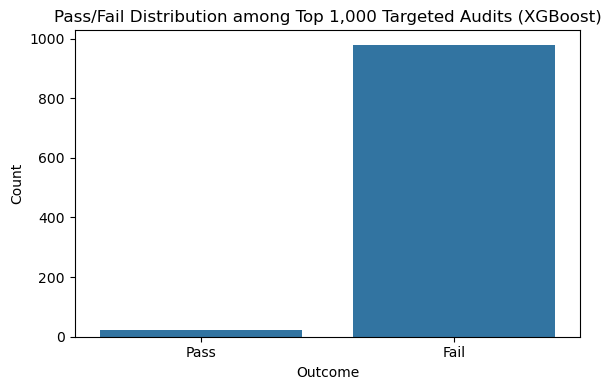

In [60]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
# Take first 1,000 rows after sorting (most risky)
top_1000 = audit_scores_sorted.head(1000)

print("Top 1,000 (targeted) audits — counts:")
print(top_1000["true_label"].value_counts())
print("\nTop 1,000 (targeted) audits — shares:")
print(top_1000["true_label"].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x="true_label", data=top_1000)
plt.xticks([0, 1], ["Pass", "Fail"])
plt.title("Pass/Fail Distribution among Top 1,000 Targeted Audits (XGBoost)")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


This figure helps us determine that our XGBoost model is useful since it effectively determined that most of the top 1000 riskiest businesses failed inspections. This makes sense since I ordered, the data to list our the top 1000 businesses that are most likely to fail. The XGboost model is effective at identifying high risk establishments, and is useful for priortized auditing. 

Random 1,000 audits — counts:
true_label
0    797
1    203
Name: count, dtype: int64

Random 1,000 audits — shares:
true_label
0    0.797
1    0.203
Name: proportion, dtype: float64


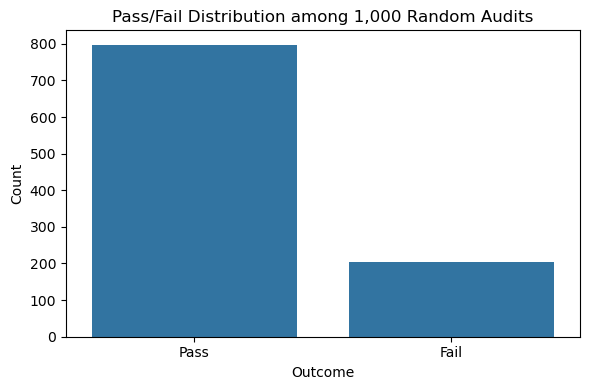

In [61]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------
# Randomly sample 1,000 observations from the full dataset
random_1000 = audit_scores.sample(n=1000, random_state=42)

print("Random 1,000 audits — counts:")
print(random_1000["true_label"].value_counts())
print("\nRandom 1,000 audits — shares:")
print(random_1000["true_label"].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x="true_label", data=random_1000)
plt.xticks([0, 1], ["Pass", "Fail"])
plt.title("Pass/Fail Distribution among 1,000 Random Audits")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Now when we conduct 1,000 random audits, our model passes about 80% of the businesses, and fails 20%. However, random inspections may not be useful to the Chicago public health department since audit costs are costly. It would be better for them to prioritize high risk businesses like above, to improve overall public health quality metrics. 

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [62]:
chicago_inspections_2014.head()


,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Results
0,920444,2014-01-15,GALLISTEL LANGUAGE ACADEMY,GALLISTEL LANGUAGE ACADEMY,2046708,School,Risk 1 (High),10200 S AVENUE J,CHICAGO,IL,60617.0,Canvass,41.709957,-87.534223,"(41.70995714781606, -87.5342225149751)",Other,0,1,5,0,0,0,2,0.964384,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,41.67,13.533333,0.726667,2.149376,7.705332,9.535848,0,Fail
1,920445,2014-02-03,SUBWAY,SUBWAY,2183563,Restaurant,Risk 1 (High),4025 E 106TH ST,CHICAGO,IL,60617.0,Canvass,41.702577,-87.525872,"(41.70257660937248, -87.52587169711877)",Restaurant,2,0,0,0,0,0,0,0.794521,0,2183563-20120829,2183563.0,375027.0,AMI SUB INC.,SUBWAY,4025 E 106TH ST 1,CHICAGO,IL,60617.0,10.0,38.0,10-38,4.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,2183563.0,ISSUE,2012-08-29,2014-09-15,AAI,41.702577,-87.525872,2012-08-29,2018-09-15,1.432877,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,12.034833,7.194320,1.219222,1,Pass w/ Conditions
2,920446,2014-02-03,SHARKS FISH & CHICKEN,SHARKS FISH & CHICKEN,1477112,Restaurant,Risk 2 (Medium),2027 E 95TH ST,CHICAGO,IL,60617.0,Canvass,41.722372,-87.574275,"(41.72237211196818, -87.57427469548966)",Restaurant,0,0,6,0,0,0,2,0.660274,0,1477112-20120716,2155150.0,273266.0,"A & K SHARKS, INC.",SHARKS FISH & CHICKEN,2027 E 95TH ST,CHICAGO,IL,60617.0,7.0,49.0,7-49,4.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1477112.0,RENEW,2012-07-16,2014-07-15,AAI,41.722372,-87.574275,2004-03-02,2018-07-15,9.931507,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,26.292725,27.837325,12.401466,0,Pass
3,920448,2014-03-07,P K PETRO INC.,MARATHON,1331469,Grocery Store,Risk 3 (Low),7001 S STONY ISLAND AVE,CHICAGO,IL,60649.0,Canvass,41.767798,-87.585820,"(41.76779762303839, -87.58581991823232)",Other,0,1,7,0,0,0,0,2.000000,1,1331469-20121216,2194284.0,257899.0,P K PETRO INC.,Stony Shell,7001 S STONY ISLAND AVE,CHICAGO,IL,60649.0,5.0,21.0,5-21,3.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1331469.0,RENEW,2012-12-16,2014-12-15,AAI,41.767798,-87.585820,2003-03-05,2018-12-15,11.013699,0,1,0,0,0,0,0,0,0,1,0,0,0.000433,25.30,7.653333,0.636667,49.468944,11.282325,66.467028,0,Fail
4,920449,2014-03-07,"Z T DOLLAR EXCHANGE,INC",DOLLAR STORE,2189299,Grocery Store,Risk 3 (Low),2429 E 72ND ST,CHICAGO,IL,60649.0,Canvass,41.764339,-87.565371,"(41.764339216775696, -87.5653706801239)",Other,1,2,5,0,0,0,0,2.000000,1,2189299-20121009,2189299.0,249904.0,"ZT DOLLAR EXCHANGE, INC.","Z T DOLLAR EXCHANGE, INC.",2429 E 72ND ST,CHICAGO,IL,60649.0,7.0,40.0,7-40,3.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,2189299.0,ISSUE,2012-10-09,2014-12-15,AAI,41.764339,-87.565371,2012-10-09,2018-12-15,1.408219,0,1,0,0,0,1,0,0,0,0,0,0,0.000433,25.30,7.653333,0.636667,69.939833,26.695701,76.827119,1,Fail


In [63]:
chicago_inspections_2014.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'ID', 'LICENSE_ID', 'ACCOUNT_NUMBER', 'LEGAL_NAME',
       'DOING_BUSINESS_AS_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP_CODE',
       'WARD', 'PRECINCT', 'WARD_PRECINCT', 'POLICE_DISTRICT', 'LICENSE_CODE',
       'LICENSE_DESCRIPTION', 'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY',
       'LICENSE_NUMBER', 'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement

In [64]:
# data processing
# -----------
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE'],
                                     inplace = True)

#set index 
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

#convert the inspection date to a datetime format
chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'])

#drop datetime info
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate'],
                                                                                  axis = 1)

#drop rows with missing data 
chicago_inspections_2014 = chicago_inspections_2014.dropna()

# process features
X_test2014 = chicago_inspections_2014.drop(columns = ['Results',
                                                        'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])

# process target 
y_test2014 = chicago_inspections_2014['Results']

#get dummies
X_test2014 = pd.get_dummies(X_test2014)


In [65]:
# predict and compare 
# -----------
y_pred = xgb_best.predict(X_test2014)

y_proba_2014 = xgb_best.predict_proba(X_test2014)



Accuracy: 0.908
Precision: 0.729
Recall: 0.860
F1 Score: 0.789


/var/folders/wg/g8vbwsg954b5dw24t4mkj80h0000gn/T/ipykernel_27824/2249831062.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  accuracy = accuracy_score(y_test2014.replace({'Pass w/ Conditions': 'Pass'}).replace({'Pass': 0, 'Fail': 1}), y_pred)
/var/folders/wg/g8vbwsg954b5dw24t4mkj80h0000gn/T/ipykernel_27824/2249831062.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  replace({'Pass': 0, 'Fail': 1}), y_pred)
/var/folders/wg/g8vbwsg954b5dw24t4mkj80h0000gn/T/ipykernel_27824/2249831062.py:7: FutureWarning: Downcasting behavior in 

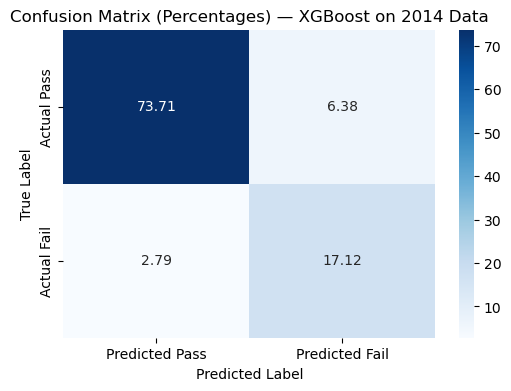

Exception ignored in: <function ResourceTracker.__del__ at 0x106bdb100>
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/CSS/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/Applications/anaconda3/envs/CSS/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/Applications/anaconda3/envs/CSS/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10877b100>
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/CSS/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/Applications/anaconda3/envs/CSS/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/Applications/anaconda3/envs/CSS/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child proces

In [69]:
# evaluate
# -----------

accuracy = accuracy_score(y_test2014.replace({'Pass w/ Conditions': 'Pass'}).replace({'Pass': 0, 'Fail': 1}), y_pred)
precision = precision_score(y_test2014.replace({'Pass w/ Conditions': 'Pass'}).
replace({'Pass': 0, 'Fail': 1}), y_pred)
recall = recall_score(y_test2014.replace({'Pass w/ Conditions': 'Pass'}).replace({'Pass': 0, 'Fail': 1}), y_pred)
f1 = f1_score(y_test2014.replace({'Pass w/ Conditions': 'Pass'}).replace({'Pass': 0, 'Fail': 1}), y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


#compare results with actual results from 2014 data with a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Convert labels
y_true = y_test2014.replace({'Pass w/ Conditions': 'Pass'}).replace({'Pass': 0, 'Fail': 1})

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Convert to percentages
cm_percent = cm / cm.sum() * 100

plt.figure(figsize=(6, 4))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Predicted Pass', 'Predicted Fail'],
            yticklabels=['Actual Pass', 'Actual Fail'])

plt.title('Confusion Matrix (Percentages) — XGBoost on 2014 Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


This confusion matrix shows that the XGBoost model performs well in predicting inspection outcomes for 2014. It correctly predicts 73.71% of all actual passes, and 17.12% of all actual fails, overall identifying the majority of both safe and unsafe establishments. It also shows a low false negative rate, which is good because it means our model rarely misses a business that truly fails, while our false positive is slightly higher. Overall, the model is good at generalizing new data and is effective at distinguishing high risk establishments from compliant ones. 

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


It is essential to have metrics beyond accuracy in social science and public policy because using accuracy alone can be misleading. If we only focus on accuracy, we will treating all mistakes as equally important and can show accuracy measures for models even when they are not performing well on the outcomes that matter most. We see that in many policy settings, the cost of different types of errors are not the same. For example, missing a truly high risk case can be harmful for the Chicago public health department, because bad food safety has the potential to harm many people. It would be more harmful to have a false negative, than incorrectly flagging false positive, a low risk case. 

This is why other metrics like precision, recall, and F1 score can help us undertand how each model is making mistakes and whether mistakes align with certain policy priortiies, such as fairness, safety, and government efficiency. Precision can help ensure fairness by measuring how often flagged establishments are truly risky. When precision is low, the model may generate many false positives, which would burden small businesses who are fully compliant. Recall is important for overall public safety because it helps the model identify true failing establishments, minimizing the amount of missed cases. Lastly, the F1 score will balance the model's precision and recall, and help the health department determine whether the model is doing good at both catching true failures and avoiding false positives. 

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

If establishments begin to adjust their behavior due to understanding the auditing algorithim, it would be best practice to retrain and update the audit algorithims periodically, so that it is updated with newer data that adapts to behavioral changes. This will ensure that our model is not outdated, and can reweight certain features that will prioritize audits. Policy makers can also utilize a diverse set of features used in the model that combine long term indicators with short term signals that are harder to manipulate. For example, keeping features such as recent customer complaints for a restaurant will incentivize these businesses to improve their health standards, which is the point of the food inspection. 

In order to keep the XGBoost model dynamic, the Chicago departmnet of Public Health can retrain the model quartely with new inspection data, and updating the feature importance each cycle. This will highlight the changes that these businesses are making, and weighting other important features that deem a business to be high risk. Also, focusing on features that are harder to manipulate such as neighborhood conditions, customer complaints, or weather will prevent the model from being manipulated. Also, adding an aspect of randomness of audits can work towards businesses that may adhere to standards just before an audit. This will ensure our model use is unpredicatable and will punish estabishments that improve standards temporarily, creating a deterrance. 



